In [147]:
import onnx
import numpy as np
import onnxruntime as ort
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [232]:
modelPath = "C:/Users/chesa/OneDrive/Desktop/model.onnx"
model = onnx.load(modelPath)
session = ort.InferenceSession(model.SerializeToString())
inputs = session.get_inputs()
print("input name: %s, shape: %s, type: %s" % (inputs[0].name, inputs[0].shape, inputs[0].type))

input name: input_1, shape: ['unk__29', 28, 28, 1], type: tensor(float)


In [330]:
#labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
#print(labels)
labels = 0
imgPath = f"C:/Users/chesa/Downloads/data/{labels}.jpg"

In [300]:
def preprocess(img):
    #read the image 
    image = cv2.imread(img)
    #Convert an image from BGR to grayscale mode 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #Convert a grayscale image to black and white using binary thresholding 
    (thresh, BnW_image) = cv2.threshold(gray_image, 28, 28, cv2.THRESH_BINARY)
    BnW_image_np = np.asarray(BnW_image)
    BnW_image_np = np.reshape(BnW_image_np, (1, 28, 28, 1)).astype(np.float32)
    plt.imshow(BnW_image)
    plt.show()
    return BnW_image_np

In [301]:
def predict(img):
    img = preprocess(img)
    pred_onx = session.run(None, {'input_1': img})
    #print("predict", pred_onx[0])
    return pred_onx[0]

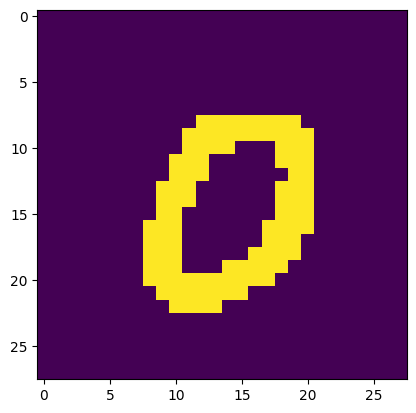

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


In [331]:
pre = predict(imgPath)
print(pre)

max = -1
ind = -1
for i in range(len(pre[0])):
    if max < pre[0][i]:
        max = pre[0][i]
        ind = i
print(ind)